# Homework 6: Problems

### ASTROINFORMATICS
https://github.com/astromundus/astroinfo2018/blob/master/homework/HW6.ipynb


## Problem 1: Principal Component Analysis

PCA applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors, 

-- LINEAR variability period (logP) and variability amplitude (A).

Read the data (see below), run PCA (with four components), and then

a) to get familar with the dataset, plot g-i vs. u-g and A vs. logP diagrams

b) plot P2 vs. P1 diagram, and P3 vs. P1 diagram, and P3 vs. P4 diagram. 
Comment what insights, if any, did PCA analysis bring. 

c) plot P1 vs. g-i and P1 vs. logP diagrams; repeat with P2, P3, and P4.
Comment what insights, if any, did PCA analysis bring. 


## Problem 2: Regression and age-color relation for asteroids

We will use age and color data for asteroid families shown in figure 1 from the paper "An age–colour relationship for main-belt S-complex asteroids" by Jedicke et al. (2004, Nature 429, 275), see http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf

Given these y(x) data (see below), with errors in both x and y, 
adapt the code introduced in 
[the last lecture](https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-8-Thu.ipynb) 
by modifying the parabola (y(x) = a + b*x + c*x^2) fitter to fit instead
the following function

$$ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right].  $$

Important: here x is time, not log(time)! But when you plot, use log(time)
for x axis (see data below).

a) What are the the best-fit values and standard errors for 
parameters a, b, c and d? 

b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

c) compare your best fit to the best fit from Jedicke et al. and comment

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): 
do you get a different best fit? 

<br>
# Homework 1: Solutions

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_LINEAR_geneva
%matplotlib 

Using matplotlib backend: Qt5Agg


In [2]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

## Problem 1

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [3]:
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']

a) to get familar with the dataset, plot g-i vs. u-g and A vs. logP diagrams

Text(0, 0.5, 'logP')

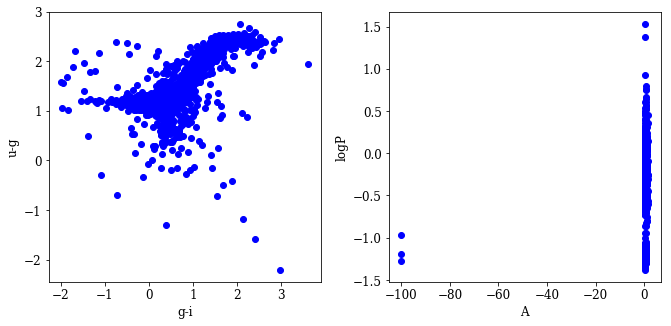

In [4]:
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25, bottom=0.15, top=0.9)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(gi,ug,'bo')
ax2.plot(A, logP, 'bo')

ax1.set_xlabel('g-i')
ax1.set_ylabel('u-g')
ax2.set_xlabel('A')
ax2.set_ylabel('logP')

b) plot P2 vs. P1 diagram, and P3 vs. P1 diagram, and P3 vs. P4 diagram. Comment what insights, if any, did PCA analysis bring. 

In [5]:
x = np.stack( (gi, ug, A, logP) )
x

array([[ 0.369    ,  0.521    ,  0.138    , ...,  0.874    ,  0.887    ,
         0.568    ],
       [ 1.166    ,  1.356    ,  1.166    , ...,  1.63     ,  1.402    ,
         1.124    ],
       [ 0.619    ,  0.709    ,  0.601    , ...,  0.462    ,  0.734    ,
         0.883    ],
       [-0.2541378, -0.2446909, -0.6093863, ..., -0.1173616, -0.5277717,
        -0.468387 ]])

In [6]:
from sklearn.decomposition import PCA

x = np.stack( (gi, ug, A, logP) )

pca = PCA(n_components=4)
pca.fit(x)
comp = pca.transform(x)
components = pca.components_


Text(0, 0.5, 'PC4')

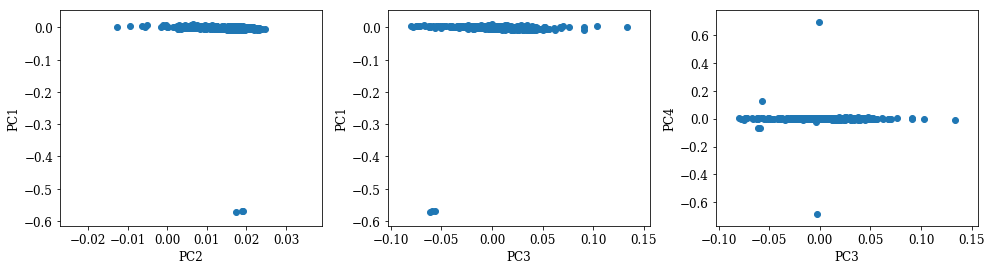

In [7]:
fig = plt.figure(figsize=(15,4))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25, bottom=0.15, top=0.9)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.scatter(components[1],components[0])

ax2.scatter(components[2],components[0])
ax3.scatter(components[2],components[3])
ax1.set_xlabel('PC2')
ax1.set_ylabel('PC1')
ax2.set_xlabel('PC3')
ax2.set_ylabel('PC1')
ax3.set_xlabel('PC3')
ax3.set_ylabel('PC4')

c) plot P1 vs. g-i and P1 vs. logP diagrams; repeat with P2, P3, and P4. Comment what insights, if any, did PCA analysis bring. 

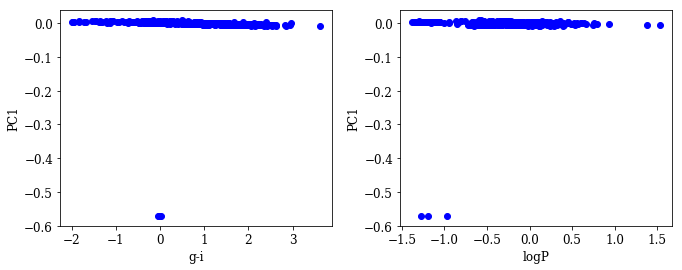

In [8]:
fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25, bottom=0.15, top=0.9)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(gi,components[0],'bo')
ax2.plot(logP, components[0],'bo')
ax1.set_xlabel('g-i')
ax1.set_ylabel('PC1');
ax2.set_xlabel('logP')
ax2.set_ylabel('PC1');

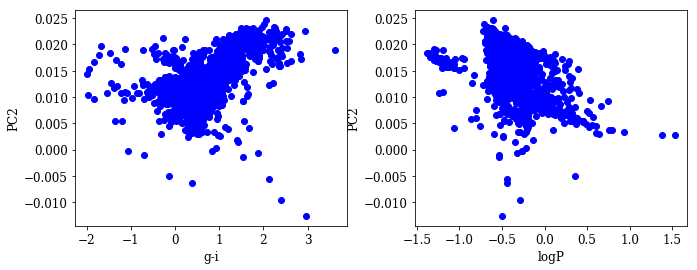

In [9]:
fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25, bottom=0.15, top=0.9)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(gi,components[1],'bo')
ax2.plot(logP, components[1],'bo')
ax1.set_xlabel('g-i')
ax1.set_ylabel('PC2');
ax2.set_xlabel('logP')
ax2.set_ylabel('PC2');

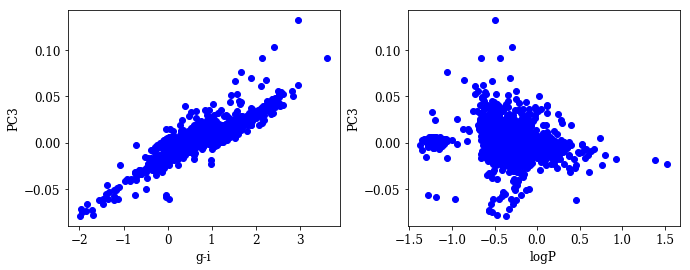

In [10]:
fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25, bottom=0.15, top=0.9)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(gi,components[2],'bo')
ax2.plot(logP, components[2],'bo')
ax1.set_xlabel('g-i')
ax1.set_ylabel('PC3');
ax2.set_xlabel('logP')
ax2.set_ylabel('PC3');

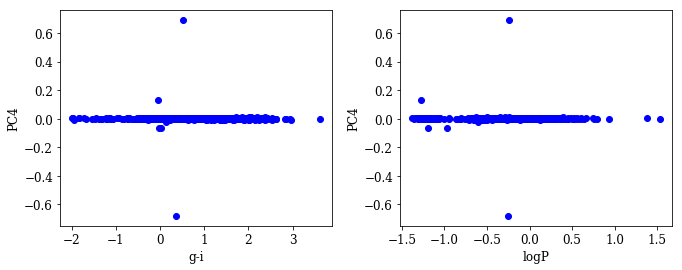

In [11]:
fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25, bottom=0.15, top=0.9)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(gi,components[3],'bo')
ax2.plot(logP, components[3],'bo')
ax1.set_xlabel('g-i')
ax1.set_ylabel('PC4');
ax2.set_xlabel('logP')
ax2.set_ylabel('PC4');

PCA enables us to decrease the dimension of our data. From plots above, we can see that data points focus in the axis of PC1 AND PC4. It means that we can use only PC1 and PC4 to fit data.

## Problem 2

These age and color data for asteroid families are taken
from the paper Jedicke et al. (2004, Nature 429, 275), see fig. 1 in http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf



In [12]:
# Age is measured in 10^6 yrs (Myr)
# Log10(age) and error (of Log(Age))
logAge = np.asarray([3.398, 2.477, 3.398, 3.477, 3.301, 1.699, 2.699, 0.763,
         2.301, 3.079,  3.176, 0.398])
LageErr = np.asarray([0.087, 0.145, 0.174, 0.145, 0.109, 0.347, 0.174, 0.015,
          0.217, 0.145, 0.145, 0.434])
# SDSS principal asteroid color PC1 and its error (per family)
PC1 = np.asarray([0.620, 0.476, 0.523, 0.582, 0.460, 0.479, 0.432, 0.351, 
       0.427, 0.522, 0.532, 0.311])
PC1err = np.asarray([0.005, 0.015, 0.007, 0.011, 0.005, 0.032, 0.033, 0.047,
        0.021, 0.015, 0.022, 0.027])
# time/age on linear axes
age = 10**logAge
# and standard error propagation (although errors can be large)
ageErr = age * LageErr * np.log(10)

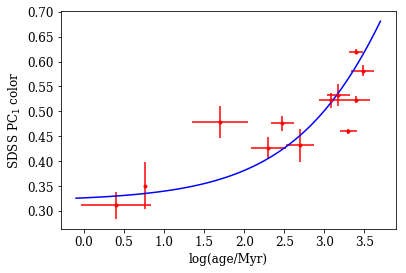

In [13]:
# let's take a quick look at the data to verify that it looks
# similar to fig. 1 from Jedicke et al. 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# Hack to fix import issue in older versions of pymc
import scipy
import scipy.misc
scipy.derivative = scipy.misc.derivative
import pymc

from astroML.plotting.mcmc import plot_mcmc
from astroML.decorators import pickle_results


logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='Observed')
plt.show() 

a) What are the the best-fit values and standard errors for parameters a, b, c and d? 

In [14]:
### y = a + b(1- exp(-(x/c)^d) )

def doMCMC(xObs, yObs, xErr, yErr, doXerror = False, nChain = 10000, nBurn = 2000): 
    def model(xObs, yObs, xErr, yErr, doXerror): 
        a = pymc.Uniform('a', -1000, 1000, value= 1.0)
        b = pymc.Uniform('b', -1000, 1000, value= 0.0)
        c = pymc.Uniform('c', -1000, 1000, value= 0.0)
        d = pymc.Uniform('d', -1000, 1000, value= 0.0)

        if (doXerror):
            xLatent = pymc.Normal('x', mu=xObs, tau=(xErr)**-2)  
        else:
            xLatent = xObs 
        
        @pymc.deterministic()
        def new(x=xLatent, a=a, b=b, c=c, d=d):
            return a + b*(1- np.exp(-(x/c)**d) )
    
        y = pymc.Normal('y', mu=new, tau=(yErr)**-2, value=yObs, observed=True)
        return locals()

    myModel = pymc.MCMC(model(xObs,yObs, xErr, yErr, doXerror))
    myModel.sample(nChain, nBurn, 1)
    traces = [myModel.trace(s)[:] for s in ['a', 'b', 'c', 'd']]
    M = pymc.MAP(myModel)
    M.fit()
    fit_vals = (M.a.value, M.b.value, M.c.value, M.d.value)
    return traces, fit_vals



In [15]:
traces, fit_vals = doMCMC(logAge, PC1, LageErr, PC1err, True, 200000, 20000)

/home/fuchi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/fuchi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


 [-----------------100%-----------------] 200000 of 200000 complete in 88.3 sec

/home/fuchi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


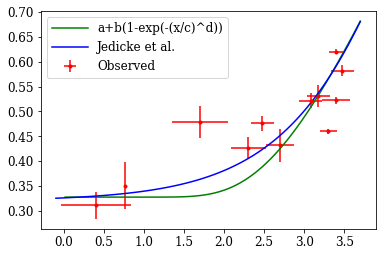

In [16]:

# extract and plot results
x_fit = np.linspace(-0.1,3.7,100)
yfit = fit_vals[0] + fit_vals[1] * (1- np.exp(-(x_fit/fit_vals[2])**fit_vals[3]) )
plt.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', marker='.', ls='None', label='Observed')
plt.plot(x_fit,yfit,'-', c='green', label='a+b(1-exp(-(x/c)^d))')
plt.plot(logT,color, c='blue',label='Jedicke et al.')
plt.legend()
plt.show()

In [17]:
print("BASIC STATS:")
print( 'a:', np.mean(traces[0]), np.median(traces[0]), np.std(traces[0]))
print( 'b:', np.mean(traces[1]), np.median(traces[1]), np.std(traces[1]))
print( 'c:', np.mean(traces[2]), np.median(traces[2]), np.std(traces[2]))
print( 'd:', np.mean(traces[3]), np.median(traces[3]), np.std(traces[3]))

BASIC STATS:
a: 2.493096767287153 2.9287754258484626 0.9431773024906953
b: -3.8576751724527774 -3.1461689955889818 1.732858961290586
c: 3.7425110022609616 4.595475290530622 3.4765766508959643
d: -1.041894515924536 -0.7761634519625602 0.805259066744601


b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

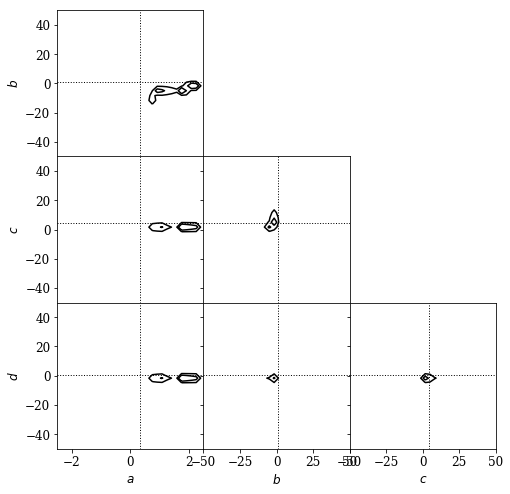

In [18]:
labels = ['$a$', '$b$', '$c$','$d$']
limits = [(-2.5, 2.5), (-50, 50), (-50,50), (-50,50)]
TLS = [0.32, 1.0, np.log10(2.5e4), 0.5]
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(bottom=0.3, top=0.8, left=0.15, right=0.9,
                    hspace=0.15, wspace=0.15)

# This function plots multiple panels with the traces
plot_mcmc(traces, labels=labels, limits=limits, true_values=TLS, fig=fig,
          bins=30, colors='k')

plt.show()

c) compare your best fit to the best fit from Jedicke et al. and comment

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): do you get a different best fit? 

In [25]:
traces2, fit_vals2 = doMCMC(logAge, PC1, -3, PC1err, True, 200000, 20000)

/home/fuchi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/fuchi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


 [-----------------100%-----------------] 200000 of 200000 complete in 87.2 sec

/home/fuchi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


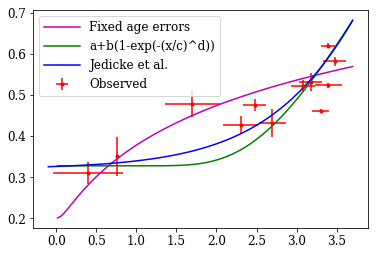

In [26]:
x_fit = np.linspace(-0.1,3.7,100)
yfit2 = fit_vals2[0] + fit_vals2[1] * (1- np.exp(-(x_fit/fit_vals2[2])**fit_vals2[3]) )

plt.plot(x_fit,yfit2,'-', c='m', label='Fixed age errors')

plt.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', marker='.', ls='None', label='Observed')
plt.plot(x_fit,yfit,'-', c='green', label='a+b(1-exp(-(x/c)^d))')
plt.plot(logT,color, c='blue',label='Jedicke et al.')

plt.legend()
plt.show()

In [27]:
print("BASIC STATS:")
print( 'a:', np.mean(traces2[0]), np.median(traces2[0]), np.std(traces2[0]))
print( 'b:', np.mean(traces2[1]), np.median(traces2[1]), np.std(traces2[1]))
print( 'c:', np.mean(traces2[2]), np.median(traces2[2]), np.std(traces2[2]))
print( 'd:', np.mean(traces2[3]), np.median(traces2[3]), np.std(traces2[3]))

BASIC STATS:
a: 0.9142197831854375 0.8973883382869454 0.13848749833796317
b: -3.560014118218649 -1.0015604381125283 4.53450113985066
c: 2.6809314453195805 1.2538990866734665 3.14877483332277
d: -0.5994999450638621 -0.5511669092094644 0.21133446180907237


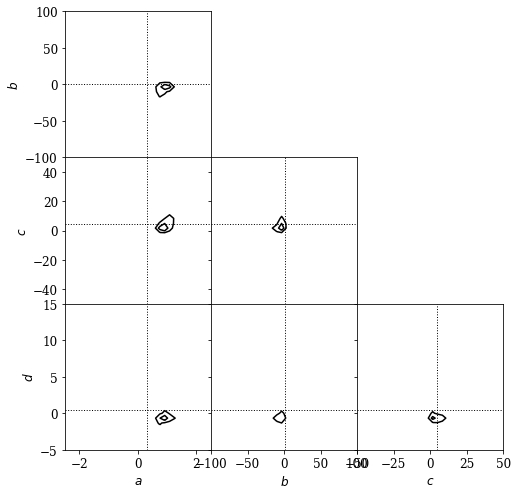

In [28]:
labels2 = ['$a$', '$b$', '$c$','$d$']
limits2 = [(-2.5, 2.5), (-100, 100), (-50,50), (-5,15)]
TLS2= [0.32, 1.0, np.log10(2.5e4), 0.5]
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(bottom=0.3, top=0.8, left=0.15, right=0.9,
                    hspace=0.15, wspace=0.15)

# This function plots multiple panels with the traces
plot_mcmc(traces2, labels=labels2, limits=limits2, true_values=TLS, fig=fig,
          bins=30, colors='k')

plt.show()